##      **Sports Image Classification**

# Downloading the Dataset
First, we need to install the Kaggle API and authenticate it to download the "Traffic Sign Detection" dataset.

In [1]:
!pip install -q kaggle
from google.colab import files
files.upload()
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [2]:
!kaggle datasets download -d gpiosenka/sports-classification
!unzip sports-classification.zip -d sports_classification_dataset

Streaming output truncated to the last 5000 lines.
  inflating: sports_classification_dataset/train/rings/022.jpg  
  inflating: sports_classification_dataset/train/rings/023.jpg  
  inflating: sports_classification_dataset/train/rings/024.jpg  
  inflating: sports_classification_dataset/train/rings/025.jpg  
  inflating: sports_classification_dataset/train/rings/026.jpg  
  inflating: sports_classification_dataset/train/rings/027.jpg  
  inflating: sports_classification_dataset/train/rings/028.jpg  
  inflating: sports_classification_dataset/train/rings/029.jpg  
  inflating: sports_classification_dataset/train/rings/030.jpg  
  inflating: sports_classification_dataset/train/rings/031.jpg  
  inflating: sports_classification_dataset/train/rings/032.jpg  
  inflating: sports_classification_dataset/train/rings/033.jpg  
  inflating: sports_classification_dataset/train/rings/034.jpg  
  inflating: sports_classification_dataset/train/rings/035.jpg  
  inflating: sports_classification_data

# Creating CSV files for train and test dataset :-

we are pre-processing the data and creating train_data.csv  and test_data.csv file with columns image_path and label for further processing:-


In [3]:
import os
import pandas as pd

# Directories for train and validation datasets
train_dir = '/content/sports_classification_dataset/train'
valid_dir = '/content/sports_classification_dataset/valid'

# Initialize lists to hold image paths and labels
image_paths = []
labels = []

# Function to process each directory (train or valid)
def process_directory(directory, label_list, path_list):
    for label in os.listdir(directory):
        label_dir = os.path.join(directory, label)
        if os.path.isdir(label_dir):
            for image_name in os.listdir(label_dir):
                if image_name.endswith('.jpg') or image_name.endswith('.png'):
                    image_path = os.path.join(label_dir, image_name)
                    path_list.append(image_path)
                    label_list.append(label)

# Process the train and valid directories
process_directory(train_dir, labels, image_paths)
process_directory(valid_dir, labels, image_paths)

# Create DataFrame and save to CSV
data = {'Image_Path': image_paths, 'Label': labels}
df = pd.DataFrame(data)

csv_file_path = '/content/sports_classification_dataset/train_data.csv'
df.to_csv(csv_file_path, index=False)

print("CSV file for train and valid folders saved successfully!")

CSV file for train and valid folders saved successfully!


In [28]:
import os
import pandas as pd

# Directory for test dataset
test_dir = '/content/sports_classification_dataset/test'

# Initialize lists to hold image paths and labels
test_image_paths = []
test_labels = []

# Function to recursively process the test directory
def process_test_directory(directory, label_list, path_list):
    for root, _, files in os.walk(directory):
        for file in files:
            if file.endswith('.jpg') or file.endswith('.png'):
                image_path = os.path.join(root, file)
                path_list.append(image_path)
                label_list.append("Unknown")

# Process the test directory
process_test_directory(test_dir, test_labels, test_image_paths)

# Create DataFrame and save to CSV
test_data = {'Image_Path': test_image_paths, 'Label': test_labels}
test_df = pd.DataFrame(test_data)

test_csv_file_path = '/content/sports_classification_dataset/test_data.csv'
test_df.to_csv(test_csv_file_path, index=False)

print("CSV file for test folder saved successfully!")

CSV file for test folder saved successfully!


# Importing Libraries :-

we need to import machine learning related API's for image processing , manipulating layers and model Xception , VGG16 and ResNet50 with pre-trained weights , pandas for reading csv files into dataframes and Matplotlib for creating visualizations, such as line plots, bar charts :-

In [5]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import Xception  , ResNet50 , EfficientNetB0 , MobileNetV2  , InceptionV3
from keras import layers, models, optimizers

# Creating Data Generators for Image Classification
This code snippet summarizes the process of creating data generators for training and validation sets . It includes setting up image data augmentation for the training set (train_datagen) and scaling for the testing set (test_datagen), defining the batch size and target image size, and loading the dataset using the flow_from_directory method with categorical class mode for image classification tasks.

In [6]:
from sklearn.model_selection import train_test_split
df = pd.read_csv('/content/sports_classification_dataset/train_data.csv')

train_df, val_df = train_test_split(df, train_size=0.8, test_size=0.2, random_state=42)
num_classes = len(df['Label'].unique())
print(num_classes)

100


In [7]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2
)
val_datagen = ImageDataGenerator(rescale=1./255)

batch_size = 32
target_size = (224, 224)

In [8]:

train_generator = train_datagen.flow_from_dataframe(dataframe=train_df,
                                                    x_col='Image_Path',
                                                    y_col='Label',
                                                    target_size=target_size,
                                                    batch_size=batch_size,
                                                    class_mode='categorical')

validation_generator = val_datagen.flow_from_dataframe(dataframe=val_df,
                                                        x_col='Image_Path',
                                                        y_col='Label',
                                                        target_size=target_size,
                                                        batch_size=batch_size,
                                                        class_mode='categorical')

Found 11193 validated image filenames belonging to 100 classes.
Found 2799 validated image filenames belonging to 100 classes.


# Exploratory Data Analysis

In [9]:
# Understand the dataset
print(train_df.head())
print(train_df.shape)
print(train_df.info())
print(train_df.describe())

                                              Image_Path  \
10476  /content/sports_classification_dataset/train/h...   
10401  /content/sports_classification_dataset/train/h...   
3710   /content/sports_classification_dataset/train/w...   
3571   /content/sports_classification_dataset/train/a...   
6925   /content/sports_classification_dataset/train/s...   

                       Label  
10476                hurdles  
10401                hurdles  
3710   wheelchair basketball  
3571            axe throwing  
6925                swimming  
(11193, 2)
<class 'pandas.core.frame.DataFrame'>
Index: 11193 entries, 10476 to 7270
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Image_Path  11193 non-null  object
 1   Label       11193 non-null  object
dtypes: object(2)
memory usage: 262.3+ KB
None
                                               Image_Path     Label
count                                               11193    

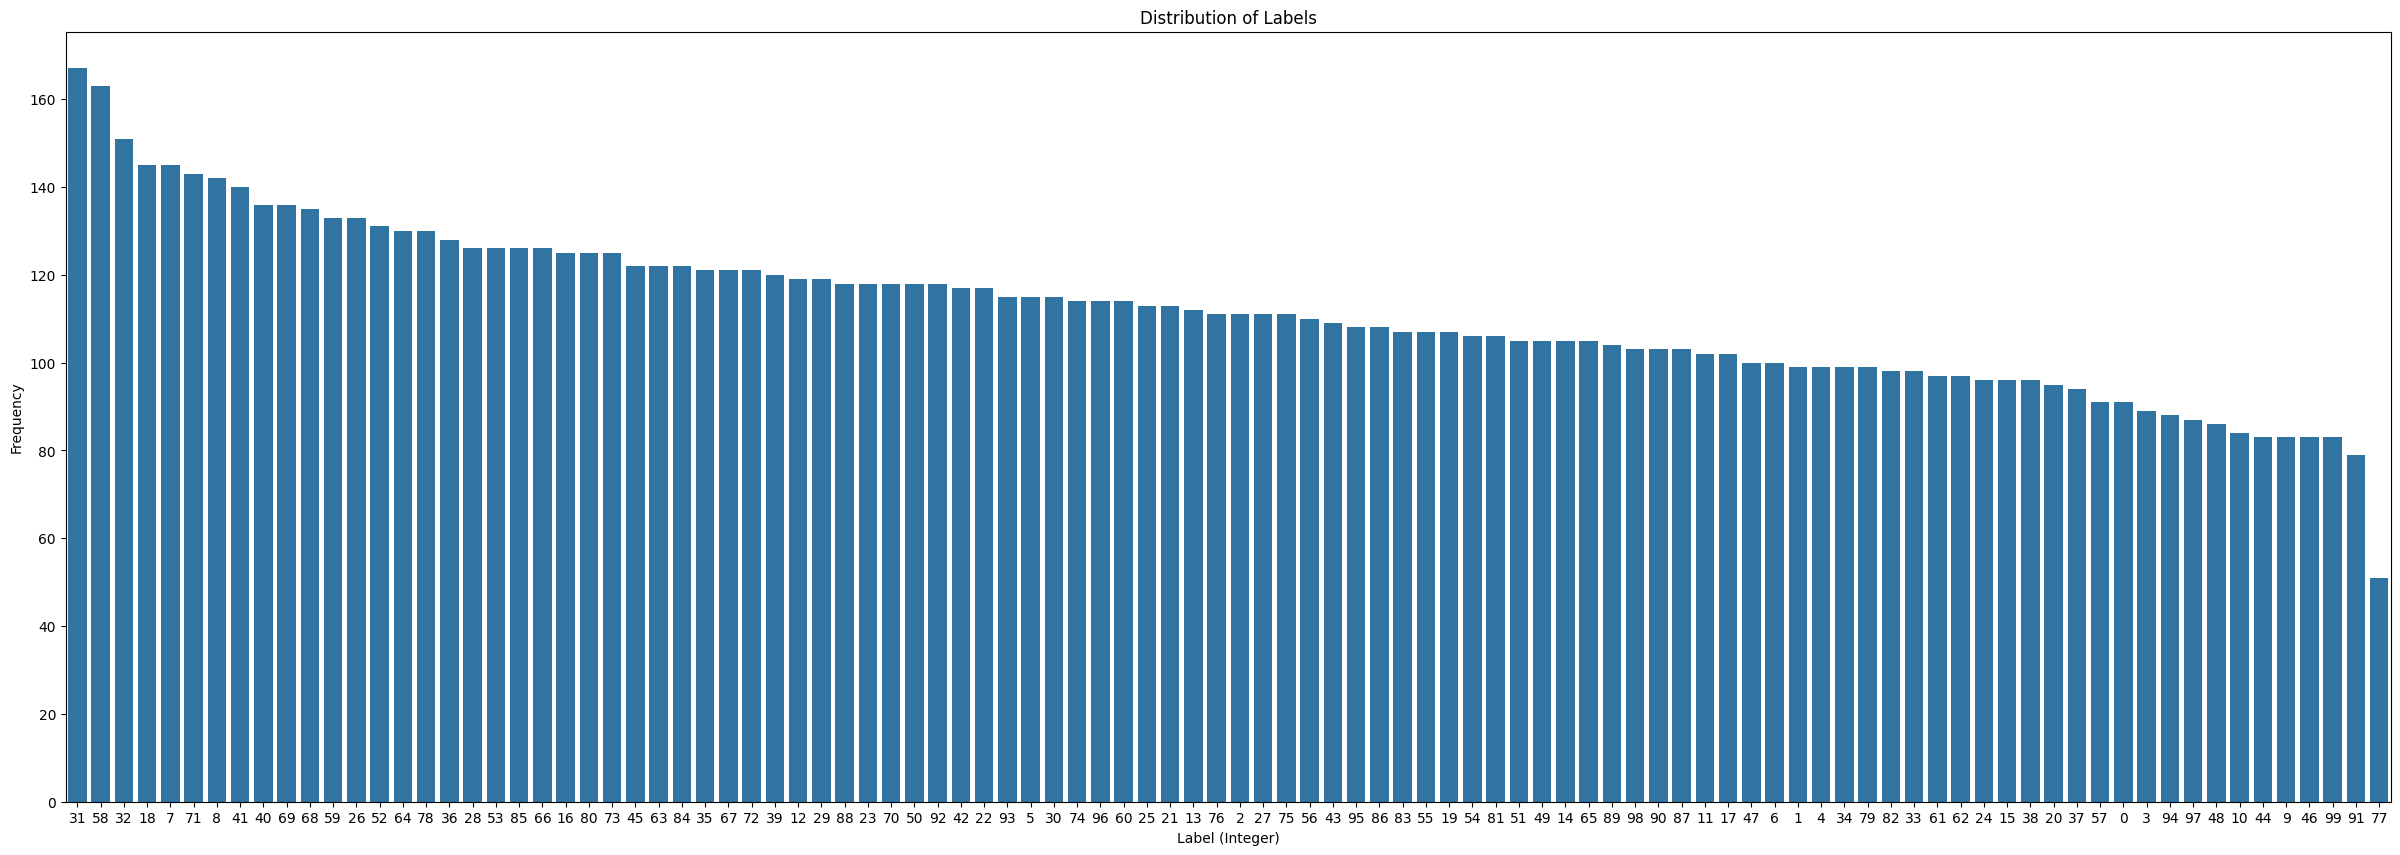

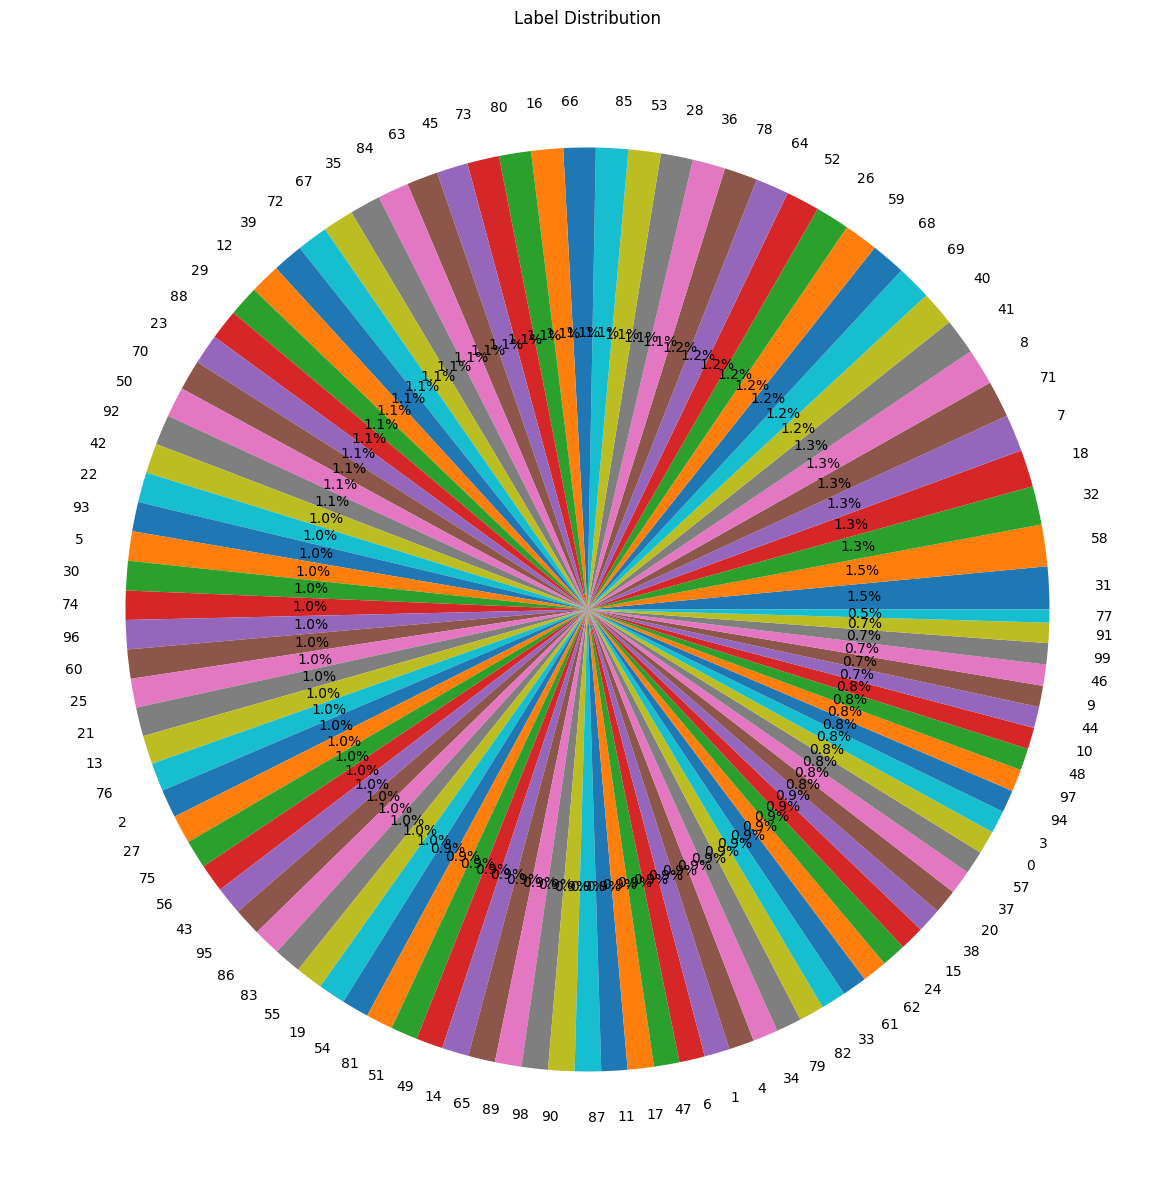

In [10]:
labels_csv_path = '/content/sports_classification_dataset/sports.csv'
labels_df = pd.read_csv(labels_csv_path)

# Convert the labels dataframe to a dictionary for easy lookup
label_to_int = dict(zip(labels_df.iloc[:, 2], labels_df.iloc[:, 0]))

# Map string labels to integer labels in train_df
train_df['Label_Int'] = train_df['Label'].map(label_to_int)

# Bar chart for label distribution
plt.figure(figsize=(30, 10))
sns.countplot(data=train_df, x='Label_Int', order=train_df['Label_Int'].value_counts().index)
plt.title('Distribution of Labels')
plt.xlabel('Label (Integer)')
plt.ylabel('Frequency')
plt.show()

# Pie chart for label distribution
plt.figure(figsize=(15, 15))
train_df['Label_Int'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Label Distribution')
plt.ylabel('')  # Hide the y-label
plt.show()

Number of unique image paths: 11193


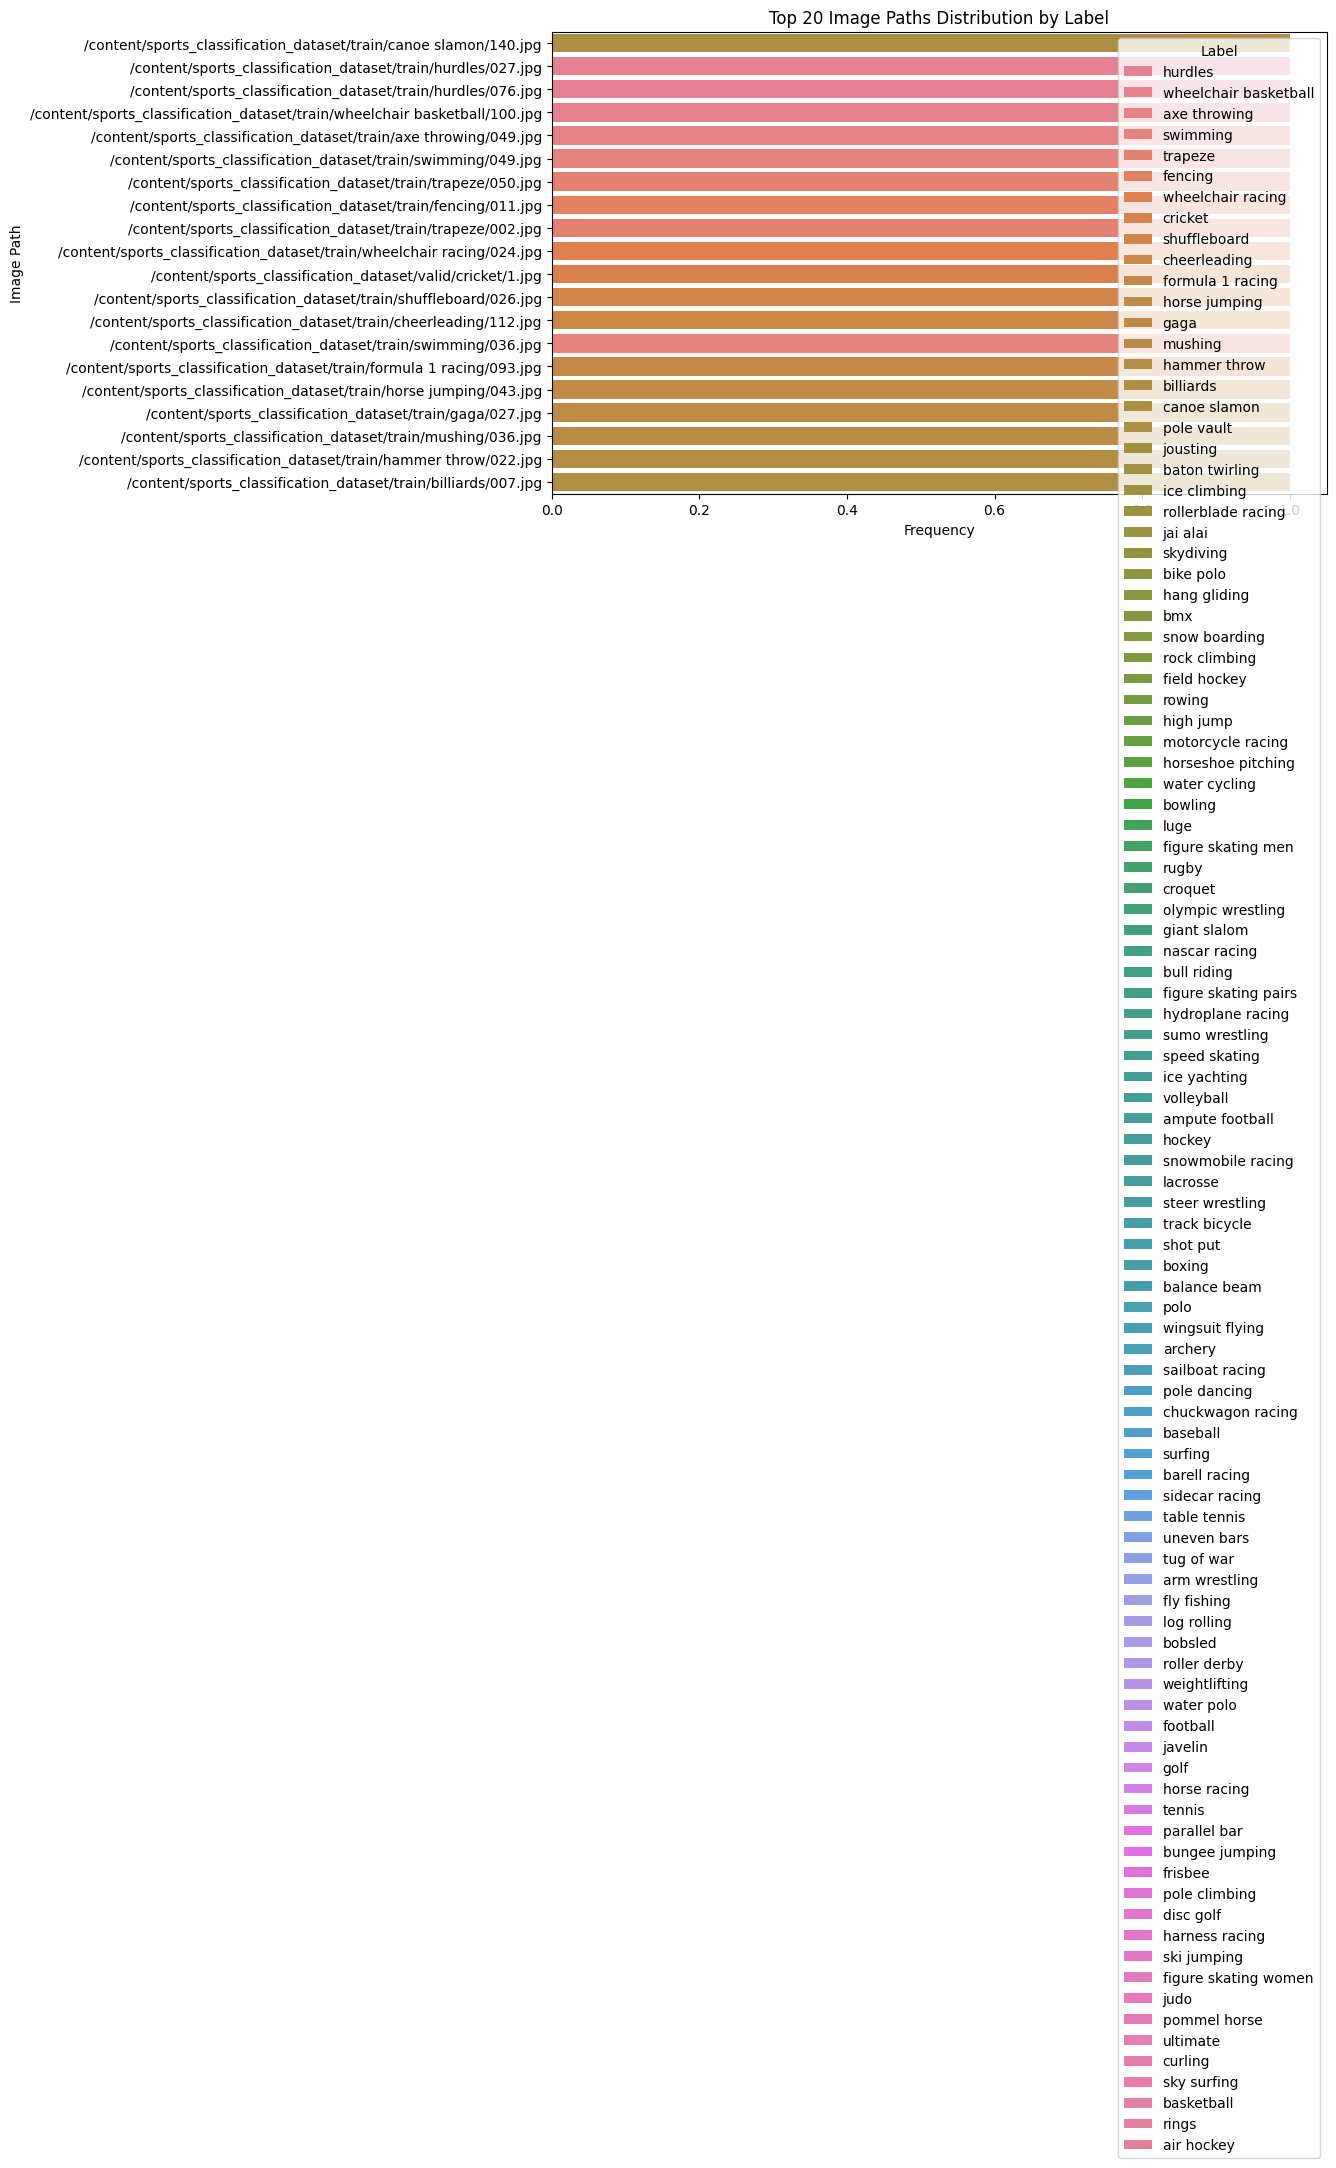

Column Image_Path has 11193 unique values.
Column Label has 100 unique values.


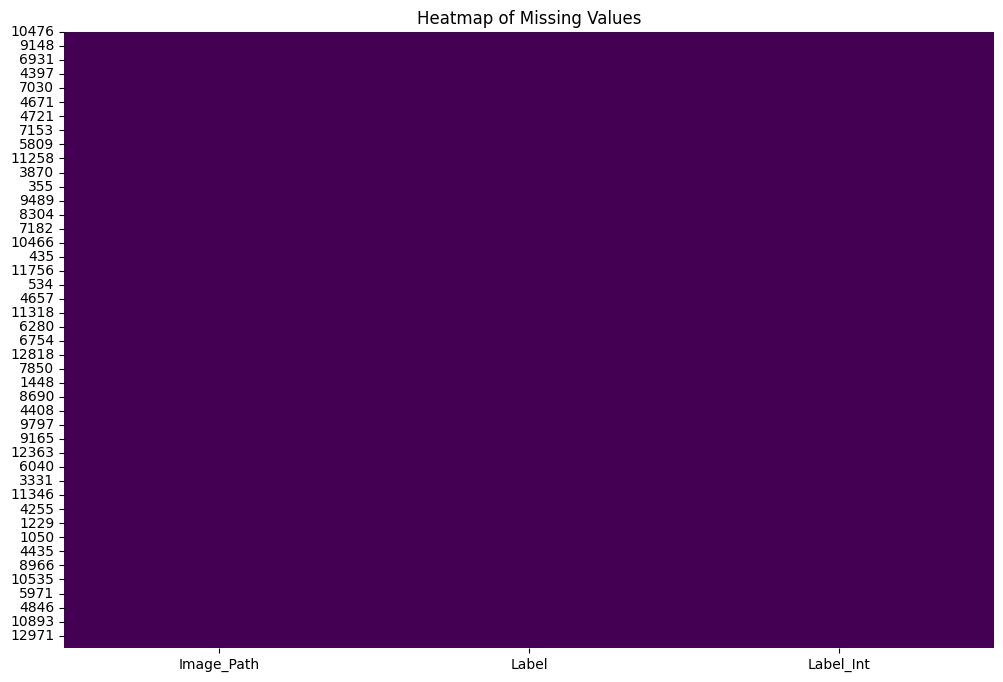

Label
football              167
nascar racing         163
formula 1 racing      151
baseball              145
canoe slamon          145
                     ... 
baton twirling         83
wingsuit flying        83
horseshoe pitching     83
ultimate               79
sky surfing            51
Name: count, Length: 100, dtype: int64


In [ ]:
# Count unique image paths
unique_paths = train_df['Image_Path'].nunique()
print(f"Number of unique image paths: {unique_paths}")

# Image paths distribution by label (top 20 paths for readability)
plt.figure(figsize=(10, 6))
sns.countplot(data=train_df, y='Image_Path', hue='Label', order=train_df['Image_Path'].value_counts().index[:20])
plt.title('Top 20 Image Paths Distribution by Label')
plt.xlabel('Frequency')
plt.ylabel('Image Path')
plt.show()

# Unique values for each categorical column
for column in train_df.select_dtypes(include=['object']).columns:
    unique_values = train_df[column].nunique()
    print(f"Column {column} has {unique_values} unique values.")

# Missing values heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(train_df.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values')
plt.show()

# Label counts summary
label_counts = train_df['Label'].value_counts()
print(label_counts)

In [11]:
# Data Cleaning
print(train_df.isnull().sum())
train_df.fillna(method='ffill', inplace=True)
print(train_df.duplicated().sum())
train_df.drop_duplicates(inplace=True)

Image_Path    0
Label         0
Label_Int     0
dtype: int64
0


# Customizing model according to our usecase
This code snippet summarizes the process of creating a custom keras categorical classification model in Keras. It involves loading the pre-trained Xception , VGG16 and ResNet50  model, freezing its layers, adding custom layers for classification, compiling the model, shuffling the training data, and training the model. Finally, the trained model is saved as an HDF5 file .

In [12]:
from keras import Sequential
from keras.layers import Dense
from keras import optimizers
from keras.layers import Dense, GlobalAveragePooling2D

from keras.layers import Dropout

def create_model(base_model, input_shape, num_classes):
    base_model.trainable = True  # Unfreeze the base model
    model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dense(512, activation='relu'),
        Dropout(0.5),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    return model

In [13]:
from keras.callbacks import EarlyStopping
def train_and_evaluate(model, train_data, val_data, model_name, epochs=10):
    # Compile the model
    model.compile(optimizer=optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

    # Early stopping callback
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    # Train the model with the specified number of epochs
    history = model.fit(train_generator,
                        validation_data=validation_generator,
                        steps_per_epoch=len(train_generator),
                        epochs=epochs,
                        callbacks=[early_stopping])

    # Evaluate the model
    val_accuracy = history.history['val_accuracy'][-1]
    print(f'{model_name} Validation Accuracy: {val_accuracy:.4f}')

    # Plot training history
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0, 1])
    plt.legend(loc='lower right')
    plt.title(f'{model_name} Accuracy')
    plt.show()

    return history

In [14]:
def model_training (base_models):
  # Directory to save the models
  save_dir = 'saved_models'
  if not os.path.exists(save_dir):
      os.makedirs(save_dir)

  # Adjustments for ResNet50
  # Train and evaluate each model
  histories = {}
  for base_model, input_shape, model_name in base_models:
      # Resize data if necessary (dummy data, so not applicable here)
      if input_shape != (224, 224, 3):
          # Resize X_train and X_val to the required input_shape
          # This is just a placeholder, implement actual resizing if needed
          pass

      # Create the model
      model = create_model(base_model, input_shape, num_classes)

      if model_name == 'ResNet50':
          # Unfreeze more layers for ResNet50 and adjust learning rate
          for layer in model.layers[-30:]:
              layer.trainable = True
          epochs = 15
          optimizer = optimizers.Adam(learning_rate=0.0001)
      else:
          epochs = 13
          optimizer = optimizers.Adam()

      # Compile the model
      model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

      print(f'Training {model_name}...')
      history = train_and_evaluate(model, train_generator, validation_generator, model_name, epochs=epochs)
      histories[model_name] = history

      # Saving the model after training
      model.save(os.path.join(save_dir, f'{model_name}_saved.h5'))
      print(f'Saved {model_name} model to {save_dir}/{model_name}_saved.h5')

# Loading the Base-Model
This code snippet defines Xception , ResNet50 and VGG16 base model in Keras. The model is configured with an input shape of (224, 224, 3) for VGG16 & ResNet50 and input shape of (299 , 299 , 3) for Xception to match the size and channels of the images in the dataset. It includes all layers of the MobileNetV2 model up to the final fully connected layers but excludes the last fully connected layer, which is often customized for specific tasks.

94765736/94765736 [==============================] - 0s 0us/step
Training EfficientNetB0...
Epoch 1/13
350/350 [==============================] - 224s 521ms/step - loss: 4.5212 - accuracy: 0.0321 - val_loss: 4.5774 - val_accuracy: 0.0154
Epoch 2/13
350/350 [==============================] - 177s 507ms/step - loss: 3.6632 - accuracy: 0.1671 - val_loss: 3.5391 - val_accuracy: 0.2251
Epoch 3/13
350/350 [==============================] - 179s 510ms/step - loss: 2.5334 - accuracy: 0.3635 - val_loss: 2.0646 - val_accuracy: 0.5095
Epoch 4/13
350/350 [==============================] - 178s 507ms/step - loss: 1.8469 - accuracy: 0.5192 - val_loss: 4.7798 - val_accuracy: 0.1426
Epoch 5/13
350/350 [==============================] - 178s 507ms/step - loss: 1.3880 - accuracy: 0.6251 - val_loss: 5.2381 - val_accuracy: 0.1658
Epoch 6/13
350/350 [==============================] - 181s 516ms/step - loss: 1.0943 - accuracy: 0.7002 - val_loss: 21.9224 - val_accuracy: 0.0518
Epoch 7/13
350/350 [===========

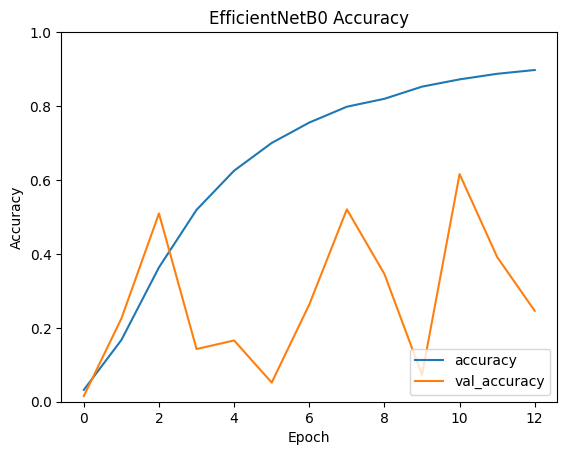

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Saved EfficientNetB0 model to saved_models/EfficientNetB0_saved.h5
Training ResNet50...
Epoch 1/15
350/350 [==============================] - 238s 570ms/step - loss: 4.2170 - accuracy: 0.0898 - val_loss: 4.6712 - val_accuracy: 0.0064
Epoch 2/15
350/350 [==============================] - 197s 563ms/step - loss: 2.7882 - accuracy: 0.3475 - val_loss: 3.6561 - val_accuracy: 0.1829
Epoch 3/15
350/350 [==============================] - 199s 567ms/step - loss: 1.8401 - accuracy: 0.5478 - val_loss: 1.2625 - val_accuracy: 0.6870
Epoch 4/15
350/350 [==============================] - 197s 563ms/step - loss: 1.3073 - accuracy: 0.6712 - val_loss: 0.7860 - val_accuracy: 0.8021
Epoch 5/15
350/350 [==============================] - 197s 563ms/step - loss: 1.0073 - accuracy: 0.7494 - val_loss: 0.6875 - val_accuracy: 0.8342
Epoch 6/15
350/350 [==============================] - 199s 569ms/step - loss: 0.8052 - accuracy: 0.7990 - val_loss: 0.6592 - val_accuracy: 0.8399
Epoch 7/15
350/350 [================

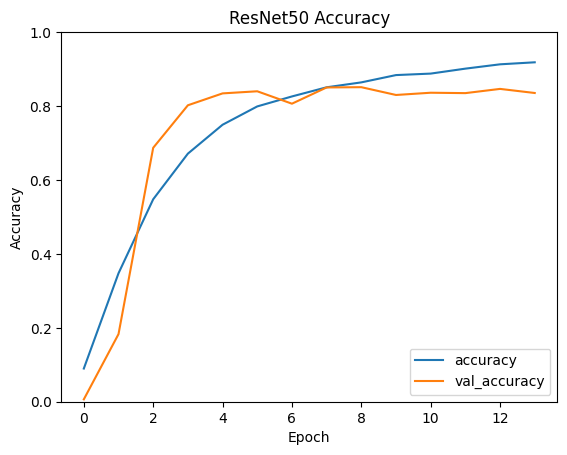

Saved ResNet50 model to saved_models/ResNet50_saved.h5


In [15]:
# List of base models with their respective input shapes
base_models1 = [
    (EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3)), (224, 224, 3),'EfficientNetB0'),
    (ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3)), (224, 224, 3), 'ResNet50')
]
model_training (base_models1)

9406464/9406464 [==============================] - 1s 0us/step
Training InceptionV3...
Epoch 1/13
350/350 [==============================] - 244s 562ms/step - loss: 4.3174 - accuracy: 0.0711 - val_loss: 3.0663 - val_accuracy: 0.3115
Epoch 2/13
350/350 [==============================] - 184s 524ms/step - loss: 2.8711 - accuracy: 0.3323 - val_loss: 1.4503 - val_accuracy: 0.6474
Epoch 3/13
350/350 [==============================] - 185s 528ms/step - loss: 1.7940 - accuracy: 0.5625 - val_loss: 0.8584 - val_accuracy: 0.7842
Epoch 4/13
350/350 [==============================] - 183s 523ms/step - loss: 1.2509 - accuracy: 0.6941 - val_loss: 0.7215 - val_accuracy: 0.8053
Epoch 5/13
350/350 [==============================] - 182s 519ms/step - loss: 0.9641 - accuracy: 0.7679 - val_loss: 0.5968 - val_accuracy: 0.8474
Epoch 6/13
350/350 [==============================] - 183s 522ms/step - loss: 0.7780 - accuracy: 0.8090 - val_loss: 0.5959 - val_accuracy: 0.8574
Epoch 7/13
350/350 [=================

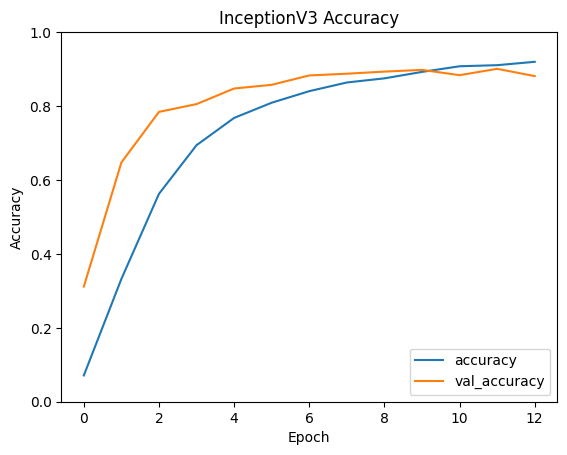

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Saved InceptionV3 model to saved_models/InceptionV3_saved.h5
Training Xception...
Epoch 1/13
350/350 [==============================] - 280s 703ms/step - loss: 4.1400 - accuracy: 0.0984 - val_loss: 2.5143 - val_accuracy: 0.4494
Epoch 2/13
350/350 [==============================] - 227s 648ms/step - loss: 2.3114 - accuracy: 0.4442 - val_loss: 0.8997 - val_accuracy: 0.7803
Epoch 3/13
350/350 [==============================] - 225s 643ms/step - loss: 1.2821 - accuracy: 0.6740 - val_loss: 0.4780 - val_accuracy: 0.8728
Epoch 4/13
350/350 [==============================] - 226s 645ms/step - loss: 0.7823 - accuracy: 0.8039 - val_loss: 0.3623 - val_accuracy: 0.9046
Epoch 5/13
350/350 [==============================] - 225s 643ms/step - loss: 0.5380 - accuracy: 0.8633 - val_loss: 0.3425 - val_accuracy: 0.9114
Epoch 6/13
350/350 [==============================] - 234s 668ms/step - loss: 0.3809 - accuracy: 0.9066 - val_loss: 0.3000 - val_accuracy: 0.9253
Epoch 7/13
226/350 [==================>...

In [ ]:
base_models2 = [
  (InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3)), (299, 299, 3), 'InceptionV3'),
  (Xception(weights='imagenet', include_top=False, input_shape=(299, 299, 3)), (299, 299, 3), 'Xception'),
  (MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3)), (224, 224, 3), 'MobileNetV2')
]
model_training (base_models2)

# Testing and labeling unseen data

In [29]:
import os
from tqdm import tqdm
import numpy as np
import pandas as pd
from keras.models import load_model
from keras.preprocessing import image

# Load test dataset
test_df = pd.read_csv('/content/sports_classification_dataset/test_data.csv')

# Load class indices (assuming you have train_generator with class indices saved)
class_indices_inverse = {v: k for k, v in train_generator.class_indices.items()}

# Directory containing the saved models
model_dir = '/content/saved_models'

# Define batch size
batch_size = 32

# Function to process images in batches
def process_images_in_batches(image_paths, model, target_size, batch_size):
    num_images = len(image_paths)
    num_batches = (num_images + batch_size - 1) // batch_size  # Calculate number of batches

    all_predictions = []

    for batch_idx in range(num_batches):
        start_idx = batch_idx * batch_size
        end_idx = min((batch_idx + 1) * batch_size, num_images)
        batch_paths = image_paths[start_idx:end_idx]

        batch_images = []
        for img_path in batch_paths:
            img = image.load_img(img_path, target_size=target_size)
            img = image.img_to_array(img)
            img = img / 255.0
            batch_images.append(img)

        batch_images = np.array(batch_images)
        batch_predictions_probs = model.predict(batch_images)
        batch_predictions = np.argmax(batch_predictions_probs, axis=1)

        all_predictions.extend(batch_predictions)

    return all_predictions

# Iterate over each model file in the directory
for model_file in os.listdir(model_dir):
    if model_file.endswith('.h5'):
        # Load the model
        model_path = os.path.join(model_dir, model_file)
        model = load_model(model_path)

        # Determine target size based on model
        if "Xception_saved" in model_file or "InceptionV3_saved" in model_file:
            target_size = (299, 299)
        else:
            target_size = (224, 224)

        # Process images in batches and make predictions
        image_paths = test_df['Image_Path'].tolist()
        prediction = process_images_in_batches(image_paths, model, target_size, batch_size)

        # Map predictions to class labels
        prediction_labels = [class_indices_inverse[label] for label in prediction]

        # Create a DataFrame with predictions
        predicted_df = pd.DataFrame({
            'Image_Path': test_df['Image_Path'],
            'Label': prediction_labels,
        })

        # Save predictions to CSV
        csv_path = f'/content/saved_models/predicted_{model_file.split(".")[0]}.csv'
        predicted_df.to_csv(csv_path, header=True, index=False)

        print(f"Predictions saved to {csv_path}")

1/1 [==============================] - 2s 2s/step
Predictions saved to /content/saved_models/predicted_ResNet50_saved.csv
1/1 [==============================] - 3s 3s/step
Predictions saved to /content/saved_models/predicted_EfficientNetB0_saved.csv


# image label and prediction and visualization

Predictions using: predicted_MobileNetV2_saved


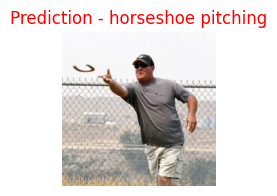

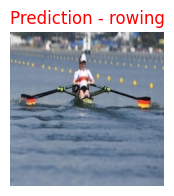

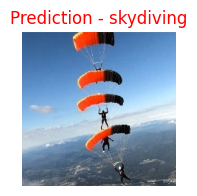

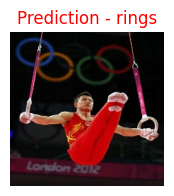

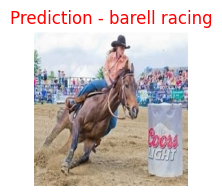

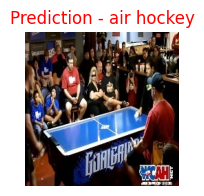

Predictions using: predicted_Xception_saved


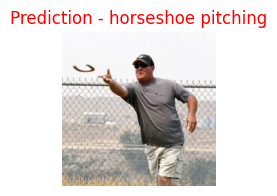

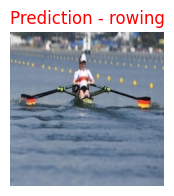

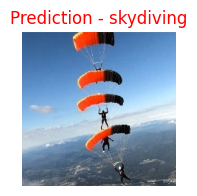

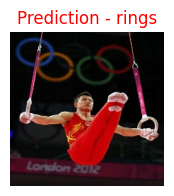

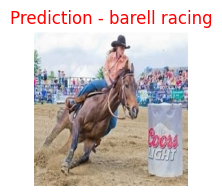

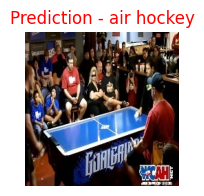

Predictions using: predicted_InceptionV3_saved


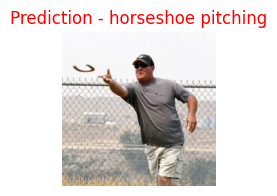

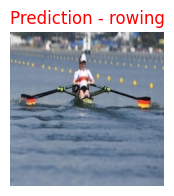

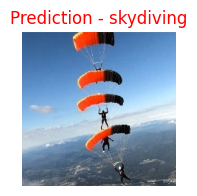

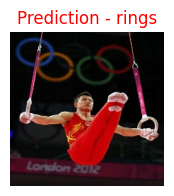

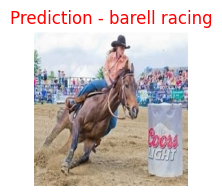

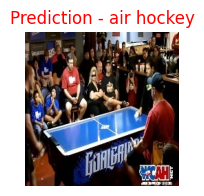

Predictions using: predicted_ResNet50_saved


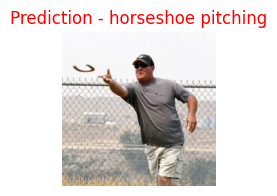

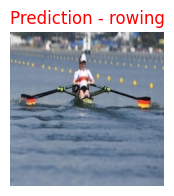

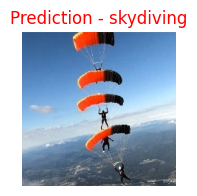

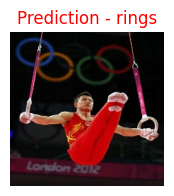

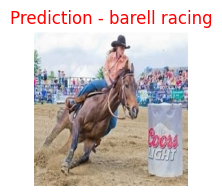

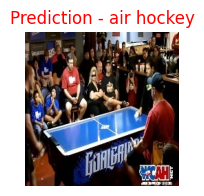

Predictions using: predicted_EfficientNetB0_saved


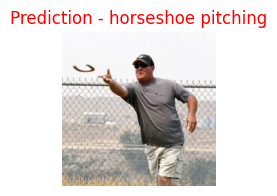

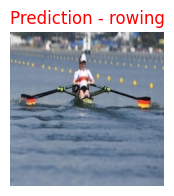

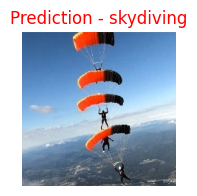

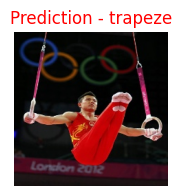

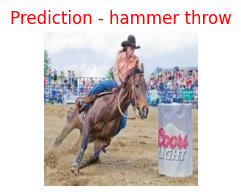

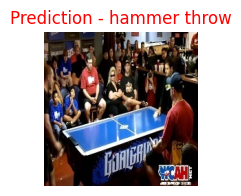

In [30]:
import csv
import os
from keras.preprocessing import image
import matplotlib.pyplot as plt

# Example usage
filenames = [
    '/content/sports_classification_dataset/test/horseshoe pitching/5.jpg',
    '/content/sports_classification_dataset/test/rowing/3.jpg',
    '/content/sports_classification_dataset/test/skydiving/5.jpg',
    '/content/sports_classification_dataset/test/rings/1.jpg',
    '/content/sports_classification_dataset/test/barell racing/4.jpg',
    '/content/sports_classification_dataset/test/air hockey/2.jpg'
]

def load_predicted_labels(csv_file_path):
    predicted_labels = {}
    with open(csv_file_path, 'r') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            predicted_labels[row['Image_Path']] = row['Label']
    return predicted_labels

def visualize_predictions(filenames, predicted_labels):
    for filename in filenames:
        img = image.load_img(filename, target_size=(224, 224))
        img_array = image.img_to_array(img)
        img_processed = img_array / 255.0  # Normalize the image

        # Check if the filename is in predicted_labels
        if filename in predicted_labels:
            predicted_class_name = predicted_labels[filename]
        else:
            print(f"Filename not found: {filename}")
            predicted_class_name = "Unknown"  # Handle cases where filename not found

        plt.figure(figsize=(2, 2))
        plt.imshow(img_processed)  # Display the processed image
        plt.title(f"Prediction - {predicted_class_name}", size=12, color='red')
        plt.axis('off')  # Hide axes
        plt.show()

# Directory containing the predicted CSV files
csv_dir = '/content/saved_models'

# Iterate over each CSV file in the directory
for csv_file in os.listdir(csv_dir):
    if csv_file.startswith('predicted_') and csv_file.endswith('.csv'):
        # Determine the model name
        model_name = csv_file.split('.')[0]

        # Path to the CSV file containing predictions for the current model
        predicted_csv_file = os.path.join(csv_dir, csv_file)

        # Load predicted labels from the CSV file
        predicted_labels = load_predicted_labels(predicted_csv_file)

        # Predict and plot images using predicted labels
        print(f"Predictions using: {model_name}")
        visualize_predictions(filenames, predicted_labels)